In [2]:
# basic
!python TransE.py

Epoch 1 | loss: 46.879642
Epoch 2 | loss: 43.000717
Epoch 3 | loss: 40.753825
Epoch 4 | loss: 39.158651
Epoch 5 | loss: 37.709862
Epoch 6 | loss: 36.537778
Epoch 7 | loss: 35.325897
Epoch 8 | loss: 34.356049
Epoch 9 | loss: 33.433013
Epoch 10 | loss: 32.473016
Epoch 11 | loss: 31.462204
Epoch 12 | loss: 30.727934
Epoch 13 | loss: 29.943106
Epoch 14 | loss: 29.086532
Epoch 15 | loss: 28.377293
Epoch 16 | loss: 27.670734
Epoch 17 | loss: 26.858281
Epoch 18 | loss: 26.298217
Epoch 19 | loss: 25.468457
Epoch 20 | loss: 24.804367
Epoch 21 | loss: 24.116731
Epoch 22 | loss: 23.548570
Epoch 23 | loss: 22.701672
Epoch 24 | loss: 22.151776
Epoch 25 | loss: 21.430538
Epoch 26 | loss: 20.906185
Epoch 27 | loss: 19.955321
Epoch 28 | loss: 19.519351
Epoch 29 | loss: 18.888453
Epoch 30 | loss: 18.194645
Epoch 31 | loss: 17.424636
Epoch 32 | loss: 16.913460
Epoch 33 | loss: 16.235453
Epoch 34 | loss: 15.605861
Epoch 35 | loss: 14.825117
Epoch 36 | loss: 14.356512
Epoch 37 | loss: 13.678253
Epoch 38 |

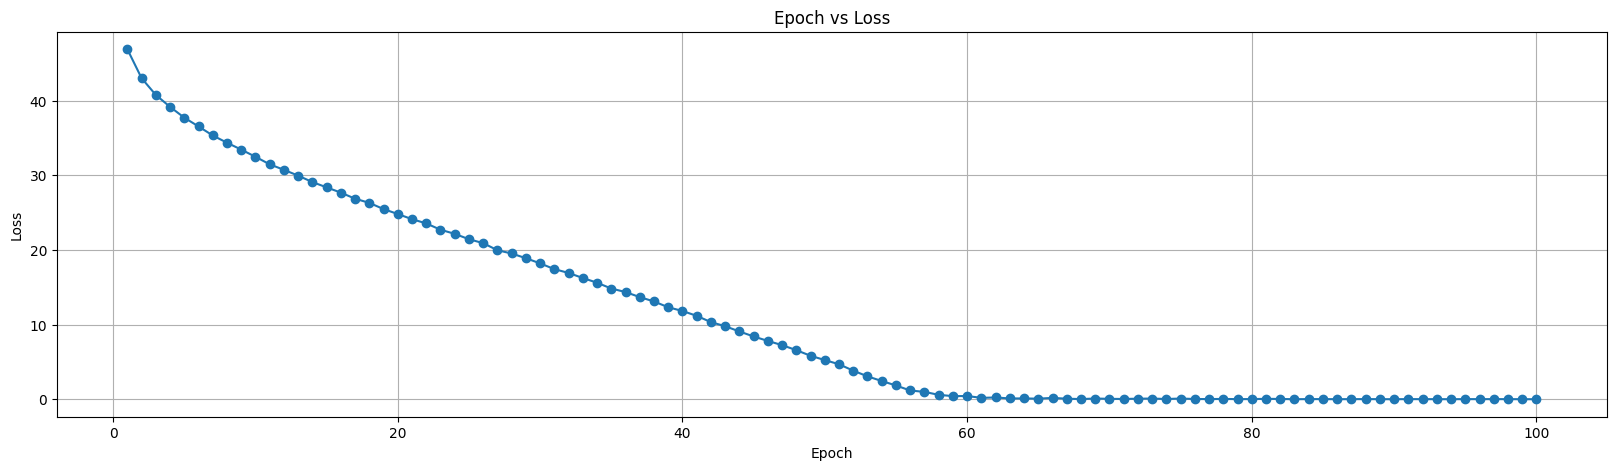

In [31]:
import matplotlib.pyplot as plt

epochs = list(range(1, 101))
losses = [
    46.879642, 43.000717, 40.753825, 39.158651, 37.709862, 36.537778, 35.325897, 34.356049, 33.433013, 32.473016,
    31.462204, 30.727934, 29.943106, 29.086532, 28.377293, 27.670734, 26.858281, 26.298217, 25.468457, 24.804367,
    24.116731, 23.548570, 22.701672, 22.151776, 21.430538, 20.906185, 19.955321, 19.519351, 18.888453, 18.194645,
    17.424636, 16.913460, 16.235453, 15.605861, 14.825117, 14.356512, 13.678253, 13.093570, 12.318261, 11.818738,
    11.168130, 10.325807, 9.779782, 9.075320, 8.405019, 7.806920, 7.244605, 6.571111, 5.819432, 5.245666, 4.682268,
    3.825593, 3.062677, 2.440205, 1.841008, 1.168539, 0.982189, 0.588951, 0.415331, 0.427206, 0.184473, 0.231714,
    0.104070, 0.104011, 0.074569, 0.178036, 0.070176, 0.018666, 0.095179, 0.050219, 0.033331, 0.071509, 0.089093,
    0.030101, 0.090498, 0.030332, 0.018289, 0.039615, 0.011977, 0.021729, 0.051603, 0.036417, 0.000000, 0.018275,
    0.015423, 0.004546, 0.011457, 0.017257, 0.008279, 0.000000, 0.015370, 0.009874, 0.007048, 0.004036, 0.014535,
    0.011012, 0.013912, 0.009338, 0.004189, 0.000000
]

# 绘制折线图
plt.figure(figsize=(20, 5))  # 设置图形的大小
plt.plot(epochs, losses, marker='o')  # 绘制带有圆圈标记的折线图
plt.title('Epoch vs Loss')  # 设置图形的标题
plt.xlabel('Epoch')  # 设置x轴的标签
plt.ylabel('Loss')  # 设置y轴的标签
plt.grid(True)  # 显示网格
plt.show()  # 显示图形

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import time
import numpy as np
from TransE import TransE
from TransE import Config
from load_data import PyTorchTrainDataLoader

In [6]:
#初始化模型
config = Config()
train_dataloader = PyTorchTrainDataLoader(
                            in_path = "./data/", 
                            nbatches = config.nbatches,
                            threads = 8)
    
transe = TransE(
            ent_tot = train_dataloader.get_ent_tot(),
            rel_tot = train_dataloader.get_rel_tot(),
            dim = config.hidden_size, #50
            p_norm = config.p_norm, 
            norm_flag = True,
            margin=config.margin)

In [7]:
#初始化wikidata词条与embedding序号之间的字典
ent_dic = {}
rel_dic = {}
f = open('./data/entity2id.txt','r')
next(f)
for index in range(train_dataloader.get_ent_tot()):
    value,key = f.readline().strip().split()
    ent_dic[int(key)] = value
f = open('./data/relation2id.txt','r')
next(f)
for index in range(train_dataloader.get_rel_tot()):
    value,key = f.readline().strip().split()
    rel_dic[int(key)] = value

In [4]:
#载入预训练的embedding参数
ent_data = np.loadtxt('entity2vec.txt')
rel_data = np.loadtxt('relation2vec.txt')
ent_data = torch.Tensor(ent_data)
rel_data = torch.Tensor(rel_data)
transe.ent_embeddings = transe.ent_embeddings.from_pretrained(ent_data)
transe.rel_embeddings = transe.rel_embeddings.from_pretrained(rel_data)

In [5]:
transe.ent_embeddings.weight

Parameter containing:
tensor([[ 1.4980e-03,  7.3000e-05,  1.3100e-04,  ...,  4.2400e-04,
          1.6300e-04,  3.2700e-04],
        [ 9.4770e-03, -6.1700e-04, -1.0322e-02,  ...,  9.7870e-03,
          8.3210e-03,  5.0400e-03],
        [-2.8906e-02, -9.3000e-05, -3.7026e-02,  ...,  2.1100e-04,
          4.8500e-04, -1.3220e-03],
        ...,
        [-1.3000e-05,  1.5520e-03,  3.2000e-05,  ..., -1.1334e-02,
         -1.6550e-03,  2.2000e-05],
        [-2.7000e-05,  1.4000e-05, -4.9370e-03,  ...,  1.9000e-05,
          6.7660e-03,  1.0450e-02],
        [ 8.7750e-03, -8.1330e-03, -6.9990e-03,  ...,  6.6280e-03,
         -0.0000e+00, -9.4220e-03]])

In [6]:
transe.rel_embeddings.weight

Parameter containing:
tensor([[-6.4514e-02,  1.1022e-01,  3.7873e-02,  ...,  4.0954e-02,
          1.7540e-03,  4.6698e-02],
        [ 4.7767e-02,  9.0294e-02, -1.2000e-05,  ...,  5.2598e-02,
          6.3662e-02, -2.8098e-02],
        [ 2.4515e-02, -1.8321e-02,  1.5092e-02,  ...,  4.1269e-02,
         -4.6200e-04,  1.3514e-02],
        ...,
        [-3.6629e-02, -7.1896e-02,  2.6840e-02,  ..., -6.6022e-02,
         -4.3655e-02, -1.1271e-01],
        [ 7.8148e-02, -3.2420e-02,  5.9684e-02,  ..., -1.1181e-01,
          5.3526e-02,  2.9649e-02],
        [-1.5445e-02,  2.4218e-02, -2.9010e-03,  ...,  4.7367e-02,
          1.0299e-02,  5.2378e-02]])

In [7]:
#预测Q30+P36最接近的尾实体
data = {'batch_h':torch.LongTensor([list(ent_dic.keys())[list(ent_dic.values()).index('Q30')]]),
        'batch_r':torch.LongTensor([list(rel_dic.keys())[list(rel_dic.values()).index('P36')]]),
        'batch_t':torch.LongTensor([i for i in range(train_dataloader.get_ent_tot())])}

In [8]:
score = transe.predict(data)
for index in score.argsort()[0:10]:
    print(ent_dic[index])

Q20
Q34266
Q29
Q33946
Q41304
Q33
Q35
Q403
Q148
Q34


In [9]:
score_WashingtonDC = score[list(ent_dic.keys())[list(ent_dic.values()).index('Q61')]]
score_WashingtonDC

1.6899345

In [10]:
per = (score_WashingtonDC - score.min())/(score.max()-score.min())
per

0.44240236

In [11]:
data_1 = {'batch_h':torch.LongTensor([list(ent_dic.keys())[list(ent_dic.values()).index('Q30')]]),
        'batch_t':torch.LongTensor([list(ent_dic.keys())[list(ent_dic.values()).index('Q49')]]),
        'batch_r':torch.LongTensor([i for i in range(train_dataloader.get_rel_tot())])}
score_1 = transe.predict(data_1)

In [12]:
for index in score_1.argsort()[0:10]:
    print(rel_dic[index])

P30
P741
P58
P790
P927
P123
P2321
P749
P186
P750


In [1]:
# p_norm = 2
!python TransE.py

Epoch 1 | loss: 45.712019
Epoch 2 | loss: 40.805072
Epoch 3 | loss: 38.448708
Epoch 4 | loss: 36.891027
Epoch 5 | loss: 35.319885
Epoch 6 | loss: 34.168199
Epoch 7 | loss: 32.915942
Epoch 8 | loss: 32.029564
Epoch 9 | loss: 31.080411
Epoch 10 | loss: 30.165115
Epoch 11 | loss: 29.261114
Epoch 12 | loss: 28.485078
Epoch 13 | loss: 27.714899
Epoch 14 | loss: 26.816895
Epoch 15 | loss: 26.175894
Epoch 16 | loss: 25.565902
Epoch 17 | loss: 24.944634
Epoch 18 | loss: 24.185394
Epoch 19 | loss: 23.512486
Epoch 20 | loss: 22.828713
Epoch 21 | loss: 22.153979
Epoch 22 | loss: 21.469230
Epoch 23 | loss: 20.756692
Epoch 24 | loss: 20.204748
Epoch 25 | loss: 19.345506
Epoch 26 | loss: 18.520662
Epoch 27 | loss: 18.028747
Epoch 28 | loss: 17.182341
Epoch 29 | loss: 16.354316
Epoch 30 | loss: 15.423030
Epoch 31 | loss: 14.543479
Epoch 32 | loss: 13.574791
Epoch 33 | loss: 12.522631
Epoch 34 | loss: 11.444358
Epoch 35 | loss: 10.371123
Epoch 36 | loss: 9.137741
Epoch 37 | loss: 8.064471
Epoch 38 | l

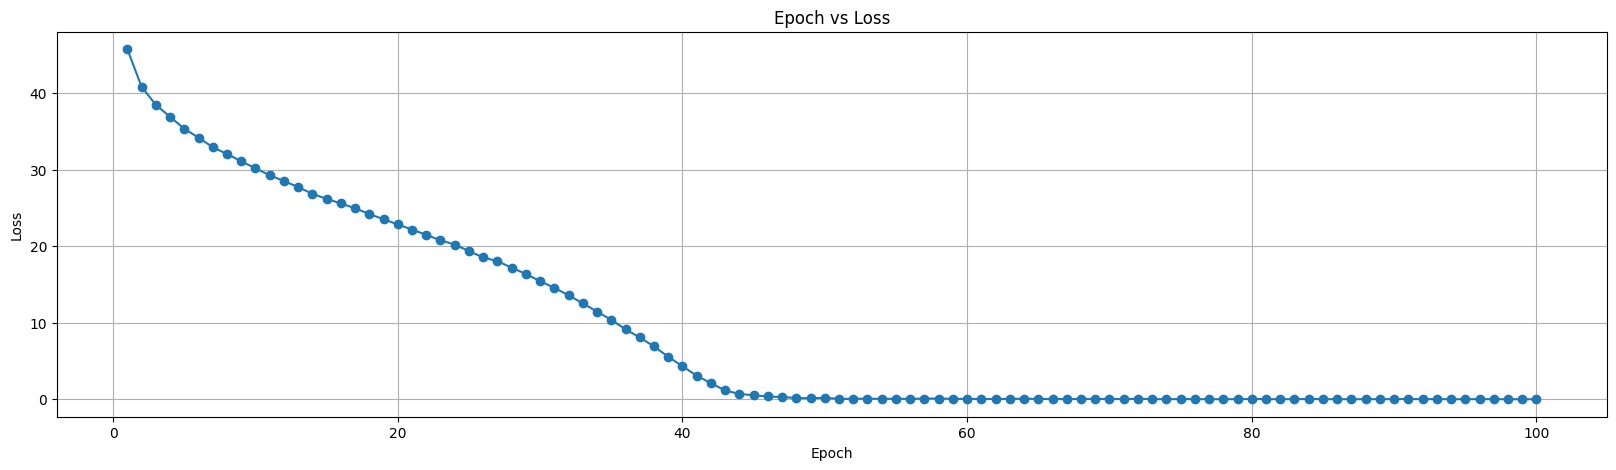

In [4]:
import matplotlib.pyplot as plt

epochs = list(range(1, 101))
losses = [
    45.712019, 40.805072, 38.448708, 36.891027, 35.319885, 34.168199, 32.915942, 32.029564, 31.080411, 30.165115,
    29.261114, 28.485078, 27.714899, 26.816895, 26.175894, 25.565902, 24.944634, 24.185394, 23.512486, 22.828713,
    22.153979, 21.469230, 20.756692, 20.204748, 19.345506, 18.520662, 18.028747, 17.182341, 16.354316, 15.423030,
    14.543479, 13.574791, 12.522631, 11.444358, 10.371123, 9.137741, 8.064471, 6.890455, 5.554142, 4.302720,
    3.080517, 2.088185, 1.146473, 0.690329, 0.510232, 0.360026, 0.274211, 0.169349, 0.122860, 0.188804,
    0.044062, 0.047108, 0.081319, 0.039628, 0.063545, 0.050417, 0.085115, 0.091090, 0.052947, 0.040857,
    0.021319, 0.036708, 0.035371, 0.074897, 0.033226, 0.029567, 0.007701, 0.044483, 0.025214, 0.037288,
    0.011366, 0.048552, 0.017019, 0.000327, 0.024453, 0.008100, 0.002409, 0.004122, 0.013253, 0.032416,
    0.011303, 0.004848, 0.009326, 0.029950, 0.009633, 0.000000, 0.001456, 0.002036, 0.014335, 0.006476,
    0.035048, 0.006394, 0.020374, 0.000000, 0.000000, 0.016572, 0.008691, 0.000000, 0.001602, 0.000000
]

# 绘制折线图
plt.figure(figsize=(20, 5))  # 设置图形的大小
plt.plot(epochs, losses, marker='o')  # 绘制带有圆圈标记的折线图
plt.title('Epoch vs Loss')  # 设置图形的标题
plt.xlabel('Epoch')  # 设置x轴的标签
plt.ylabel('Loss')  # 设置y轴的标签
plt.grid(True)  # 显示网格
plt.show()  # 显示图形

In [8]:
#载入预训练的embedding参数
ent_data = np.loadtxt('entity2vec_p_norm.txt')
rel_data = np.loadtxt('relation2vec_p_norm.txt')
ent_data = torch.Tensor(ent_data)
rel_data = torch.Tensor(rel_data)
transe.ent_embeddings = transe.ent_embeddings.from_pretrained(ent_data)
transe.rel_embeddings = transe.rel_embeddings.from_pretrained(rel_data)

In [9]:
#预测Q30+P36最接近的尾实体
data = {'batch_h':torch.LongTensor([list(ent_dic.keys())[list(ent_dic.values()).index('Q30')]]),
        'batch_r':torch.LongTensor([list(rel_dic.keys())[list(rel_dic.values()).index('P36')]]),
        'batch_t':torch.LongTensor([i for i in range(train_dataloader.get_ent_tot())])}

score = transe.predict(data)
for index in score.argsort()[0:10]:
    print(ent_dic[index])

Q34266
Q32
Q30
Q31
Q145
Q15180
Q55
Q219
Q142
Q183


In [10]:
data_1 = {'batch_h':torch.LongTensor([list(ent_dic.keys())[list(ent_dic.values()).index('Q30')]]),
        'batch_t':torch.LongTensor([list(ent_dic.keys())[list(ent_dic.values()).index('Q49')]]),
        'batch_r':torch.LongTensor([i for i in range(train_dataloader.get_rel_tot())])}
score_1 = transe.predict(data_1)

for index in score_1.argsort()[0:10]:
    print(rel_dic[index])

P30
P2239
P805
P1445
P248
P397
P1290
P275
P703
P1672


In [11]:
# margin = 1
!python TransE.py

Epoch 1 | loss: 96.191870
Epoch 2 | loss: 92.379576
Epoch 3 | loss: 90.280316
Epoch 4 | loss: 88.688480
Epoch 5 | loss: 87.263951
Epoch 6 | loss: 86.163322
Epoch 7 | loss: 84.977384
Epoch 8 | loss: 84.010514
Epoch 9 | loss: 82.970886
Epoch 10 | loss: 82.155908
Epoch 11 | loss: 81.229612
Epoch 12 | loss: 80.477027
Epoch 13 | loss: 79.631082
Epoch 14 | loss: 78.862986
Epoch 15 | loss: 78.122257
Epoch 16 | loss: 77.539298
Epoch 17 | loss: 76.748463
Epoch 18 | loss: 76.074971
Epoch 19 | loss: 75.324052
Epoch 20 | loss: 74.639324
Epoch 21 | loss: 74.020272
Epoch 22 | loss: 73.256610
Epoch 23 | loss: 72.829929
Epoch 24 | loss: 72.074014
Epoch 25 | loss: 71.430593
Epoch 26 | loss: 70.826333
Epoch 27 | loss: 70.224471
Epoch 28 | loss: 69.463662
Epoch 29 | loss: 68.726904
Epoch 30 | loss: 68.265857
Epoch 31 | loss: 67.518685
Epoch 32 | loss: 67.091821
Epoch 33 | loss: 66.286874
Epoch 34 | loss: 65.699300
Epoch 35 | loss: 64.941025
Epoch 36 | loss: 64.454560
Epoch 37 | loss: 63.836805
Epoch 38 |

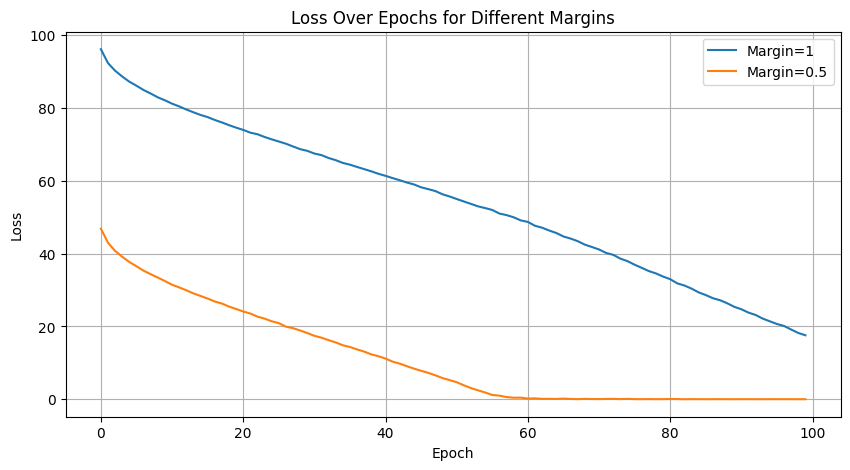

In [13]:
import matplotlib.pyplot as plt

epochs = list(range(1, 101))
losses_margin_05  = [
    46.879642, 43.000717, 40.753825, 39.158651, 37.709862, 36.537778, 35.325897, 34.356049, 33.433013, 32.473016,
    31.462204, 30.727934, 29.943106, 29.086532, 28.377293, 27.670734, 26.858281, 26.298217, 25.468457, 24.804367,
    24.116731, 23.548570, 22.701672, 22.151776, 21.430538, 20.906185, 19.955321, 19.519351, 18.888453, 18.194645,
    17.424636, 16.913460, 16.235453, 15.605861, 14.825117, 14.356512, 13.678253, 13.093570, 12.318261, 11.818738,
    11.168130, 10.325807, 9.779782, 9.075320, 8.405019, 7.806920, 7.244605, 6.571111, 5.819432, 5.245666, 4.682268,
    3.825593, 3.062677, 2.440205, 1.841008, 1.168539, 0.982189, 0.588951, 0.415331, 0.427206, 0.184473, 0.231714,
    0.104070, 0.104011, 0.074569, 0.178036, 0.070176, 0.018666, 0.095179, 0.050219, 0.033331, 0.071509, 0.089093,
    0.030101, 0.090498, 0.030332, 0.018289, 0.039615, 0.011977, 0.021729, 0.051603, 0.036417, 0.000000, 0.018275,
    0.015423, 0.004546, 0.011457, 0.017257, 0.008279, 0.000000, 0.015370, 0.009874, 0.007048, 0.004036, 0.014535,
    0.011012, 0.013912, 0.009338, 0.004189, 0.000000
]
losses_margin_1 = [
    96.191870, 92.379576, 90.280316, 88.688480, 87.263951, 86.163322, 84.977384, 84.010514, 82.970886, 82.155908,
    81.229612, 80.477027, 79.631082, 78.862986, 78.122257, 77.539298, 76.748463, 76.074971, 75.324052, 74.639324,
    74.020272, 73.256610, 72.829929, 72.074014, 71.430593, 70.826333, 70.224471, 69.463662, 68.726904, 68.265857,
    67.518685, 67.091821, 66.286874, 65.699300, 64.941025, 64.454560, 63.836805, 63.233489, 62.630084, 61.955247,
    61.388923, 60.771130, 60.180612, 59.553486, 59.022853, 58.239465, 57.742128, 57.207806, 56.330599, 55.718801,
    55.028770, 54.347697, 53.689793, 53.004143, 52.534993, 52.012874, 51.031150, 50.607511, 50.005196, 49.142154,
    48.731604, 47.664306, 47.143874, 46.360078, 45.683277, 44.726698, 44.155003, 43.440157, 42.486344, 41.838541,
    41.153497, 40.205579, 39.675233, 38.635034, 37.946898, 36.968236, 36.104163, 35.216028, 34.571659, 33.703422,
    32.990121, 31.834613, 31.253315, 30.395669, 29.360347, 28.626993, 27.760284, 27.209665, 26.385067, 25.396618,
    24.725434, 23.800614, 23.156496, 22.159050, 21.410442, 20.676806, 20.127532, 19.149628, 18.204479, 17.573520
]

# 绘制折线图
plt.figure(figsize=(10, 5))  # 设置图形的大小
plt.plot(losses_margin_1, label='Margin=1')  # 绘制margin=1的loss值
plt.plot(losses_margin_05, label='Margin=0.5')  # 绘制margin=0.5的loss值

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Loss Over Epochs for Different Margins')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

In [14]:
#载入预训练的embedding参数
ent_data = np.loadtxt('entity2vec_margin.txt')
rel_data = np.loadtxt('relation2vec_margin.txt')
ent_data = torch.Tensor(ent_data)
rel_data = torch.Tensor(rel_data)
transe.ent_embeddings = transe.ent_embeddings.from_pretrained(ent_data)
transe.rel_embeddings = transe.rel_embeddings.from_pretrained(rel_data)

In [15]:
#预测Q30+P36最接近的尾实体
data = {'batch_h':torch.LongTensor([list(ent_dic.keys())[list(ent_dic.values()).index('Q30')]]),
        'batch_r':torch.LongTensor([list(rel_dic.keys())[list(rel_dic.values()).index('P36')]]),
        'batch_t':torch.LongTensor([i for i in range(train_dataloader.get_ent_tot())])}

score = transe.predict(data)
for index in score.argsort()[0:10]:
    print(ent_dic[index])

Q668
Q30
Q142
Q31
Q174193
Q34
Q145
Q15180
Q17
Q183


In [16]:
data_1 = {'batch_h':torch.LongTensor([list(ent_dic.keys())[list(ent_dic.values()).index('Q30')]]),
        'batch_t':torch.LongTensor([list(ent_dic.keys())[list(ent_dic.values()).index('Q49')]]),
        'batch_r':torch.LongTensor([i for i in range(train_dataloader.get_rel_tot())])}
score_1 = transe.predict(data_1)

for index in score_1.argsort()[0:10]:
    print(rel_dic[index])

P30
P47
P103
P208
P196
P765
P414
P598
P404
P2184
